In [1]:
from files.utils.utility_functions import *

base_path = r"/home/catonz/Neural-PreferenceIsolation/"

In [9]:
np.array([234, 234, 242]) / 255

array([0.91764706, 0.91764706, 0.94901961])

In [15]:
plt.rcParams.update({"axes.facecolor":(0.91764706, 0.91764706, 0.94901961, 0.35)})

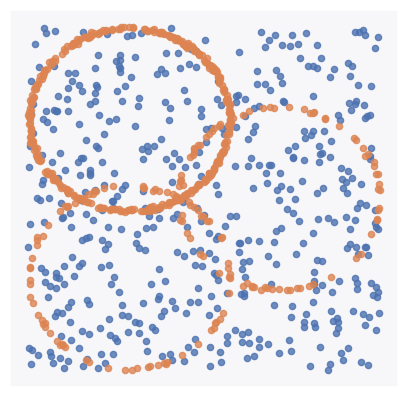

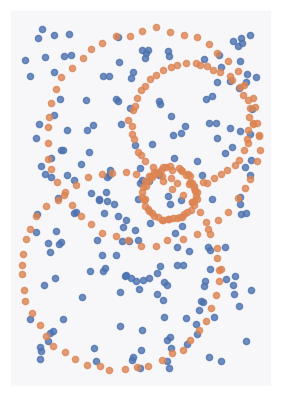

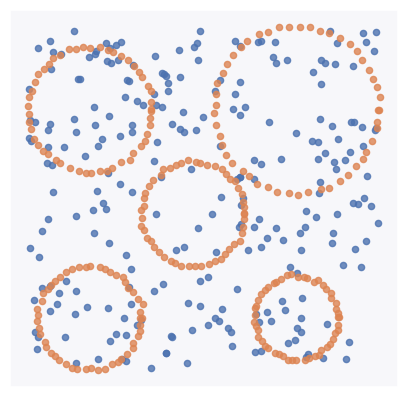

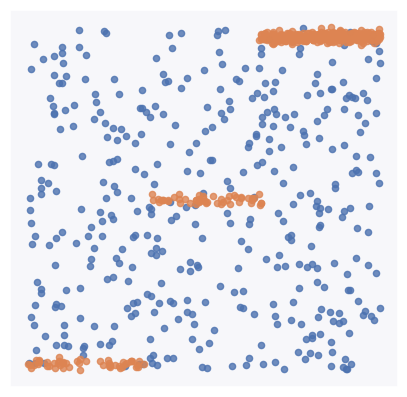

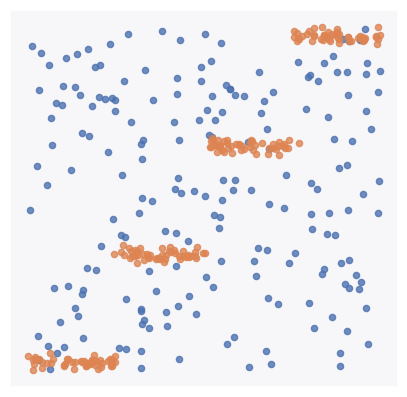

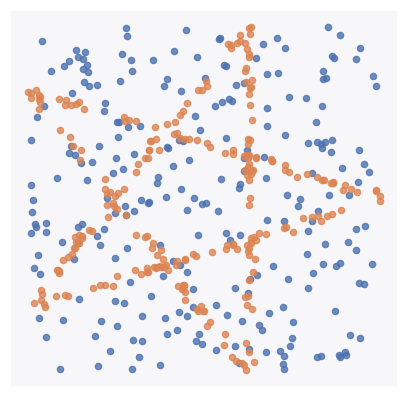

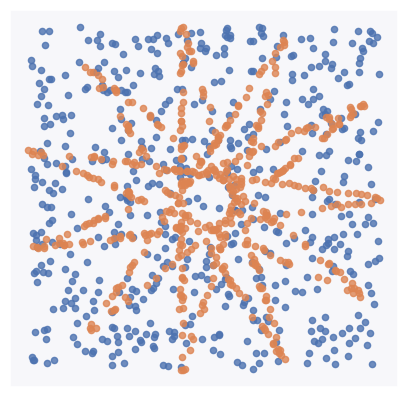

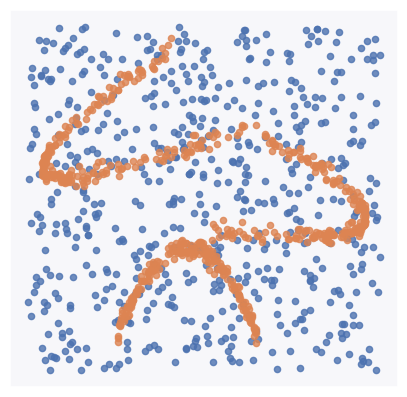

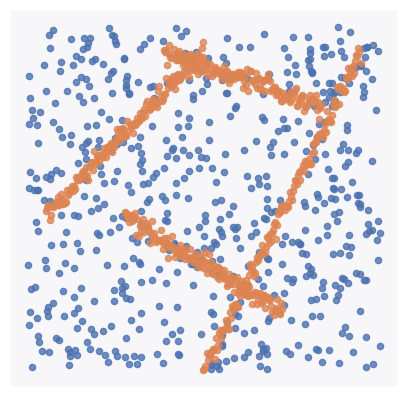

In [16]:
datasets = ["circle3", "circle4", "circle5", "stair3", "stair4", "star5", "star11", "circles_parable3", "lines_rects4",]

for name in datasets:
    ds, gt = load_dataset_by_name(base_path=base_path, name=name)
    if "_" in name:
        name = name.replace("_", "-")
    
    fig = plt.figure(dpi=100, figsize=(5, 5))
    # fig.suptitle(name, fontsize=20, y=0.93)
    if name == "circle4":
        plt.gca().set_aspect('equal')
    mask = gt == 1

    plt.scatter(ds[:,0][~mask], ds[:,1][~mask], label="Anomalies", s=20, alpha=0.8)
    plt.scatter(ds[:,0][mask], ds[:,1][mask], label="Normal", s=20, alpha=0.8)

    plt.xticks([])
    plt.yticks([])

    plt.savefig(joinpath("images", f"{name}.svg"), bbox_inches="tight")

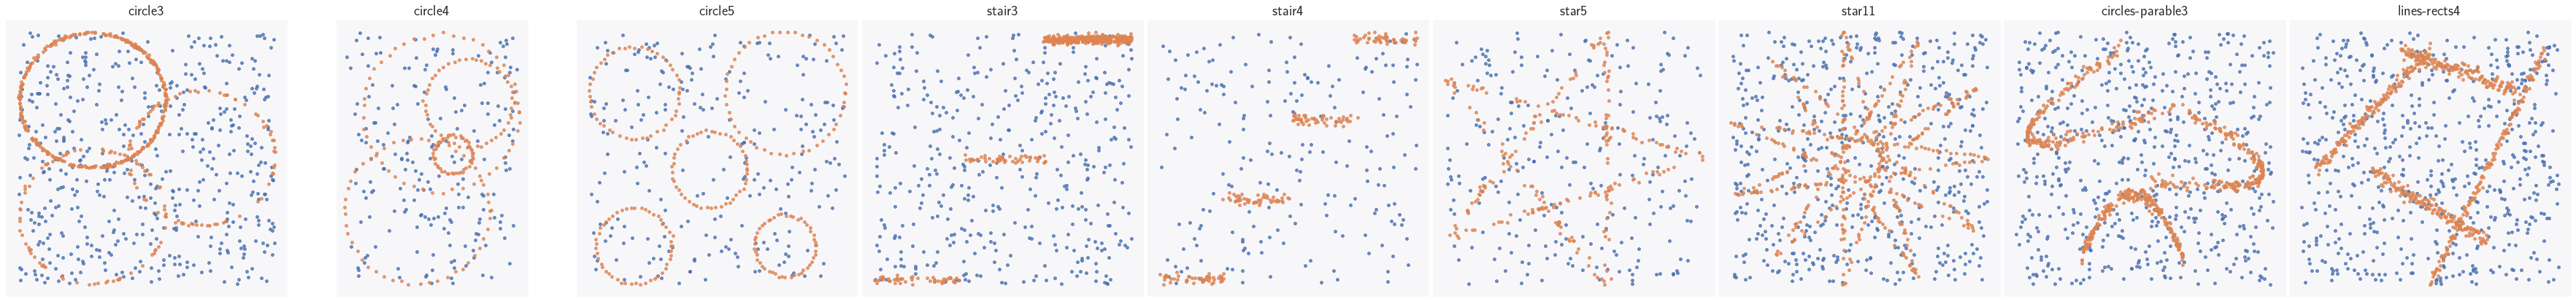

In [17]:
fig, axs = plt.subplots(1, len(datasets), figsize=(7*9, 7))

for i, name in enumerate(datasets):
    ax = axs[i]
    ds, gt = load_dataset_by_name(base_path=base_path, name=name)
    if "_" in name:
        name = name.replace("_", "-")
    
    ax.set_title(name, fontsize=20)#, y=0.93)
    if name == "circle4":
        ax.set_aspect('equal')
    mask = gt == 1

    ax.scatter(ds[:,0][~mask], ds[:,1][~mask], label="Anomalies", s=15, alpha=0.8)
    ax.scatter(ds[:,0][mask], ds[:,1][mask], label="Normal", s=15, alpha=0.8)

    ax.set_xticks([])
    ax.set_yticks([])
plt.subplots_adjust(wspace=0.01, hspace=0)

plt.savefig(joinpath("images", f"all.svg"), bbox_inches="tight")

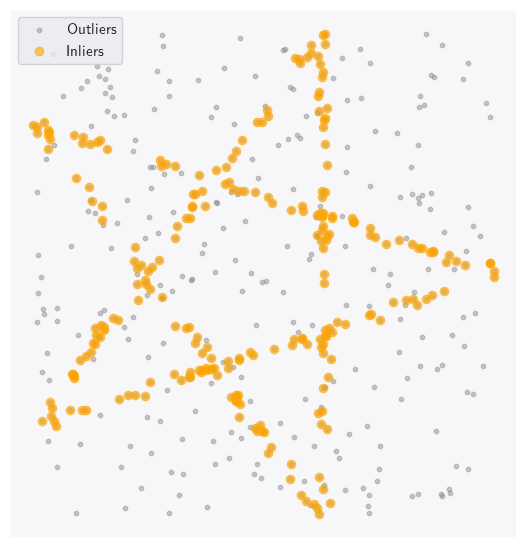

In [44]:
from files.classes.neural_models import *

ds, gt = load_dataset_by_name("star5", base_path=base_path)

fig = plt.figure(dpi=100, figsize=(7,7))
plt.scatter(ds[:,0], ds[:,1], c="grey", s=10, alpha=0.4, label="Outliers")
plt.scatter(ds[:,0][gt==1], ds[:,1][gt==1], c="orange", label="Inliers", alpha=0.6)
plt.legend()
plt.xticks([])
plt.yticks([])
plt.gca().set_aspect('equal', adjustable='box')
fig.savefig('dataset.svg', format='svg', dpi=1200)

Epoch 500/500: [==============================] (100%) ETA: 0:00:06.328092 Mean Loss: 0.02999


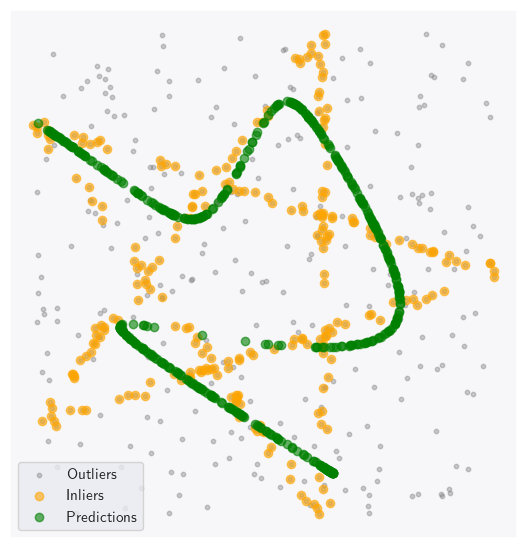

In [47]:
identity = lambda x: x
ae1 = NeuralNetwork(neurons=[2, 8, 4, 1, 4, 8, 2], activation=torch.tanh)
ae1.fit(data=ds[gt==1][:170], epochs=500, print_training=True);
predictions1 = ae1.predict(ds)

fig = plt.figure(dpi=100, figsize=(7,7))
plt.scatter(ds[:,0], ds[:,1], c="grey", s=10, alpha=0.4, label="Outliers")
plt.scatter(ds[:,0][gt==1], ds[:,1][gt==1], c="orange", label="Inliers", alpha=0.6)
plt.scatter(predictions1[:,0], predictions1[:,1], c="green", label="Predictions", alpha=0.6)
plt.legend()
plt.xticks([])
plt.yticks([])
plt.gca().set_aspect('equal', adjustable='box')
fig.savefig('predictions_ae1.svg', format='svg', dpi=1200)


Epoch 100/100: [==============================] (100%) ETA: 0:00:02.141982 Mean Loss: 0.00166


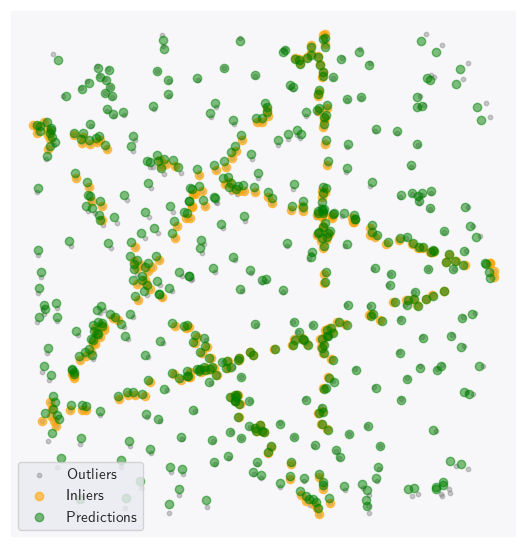

In [46]:
identity = lambda x: x
ae2 = NeuralNetwork(neurons=[2, 4, 8, 2], activation=torch.tanh)
ae2.fit(data=ds, epochs=100, print_training=True);
predictions2 = ae2.predict(ds)

fig = plt.figure(dpi=100, figsize=(7,7))
plt.scatter(ds[:,0], ds[:,1], c="grey", s=10, alpha=0.4, label="Outliers")
plt.scatter(ds[:,0][gt==1], ds[:,1][gt==1], c="orange", label="Inliers", alpha=0.6)
plt.scatter(predictions2[:,0], predictions2[:,1], c="green", label="Predictions", alpha=0.5)
plt.legend()
plt.xticks([])
plt.yticks([])
plt.gca().set_aspect('equal', adjustable='box')
fig.savefig('predictions_ae2.svg', format='svg', dpi=1200)